## Import Packages

In [1]:
import pandas as pd                                   # Dealing with csv dataset
import numpy as np                                    # Linear Algebra
from sklearn.model_selection import train_test_split  # Spilt Train/Test dataset

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns

# Preprocessing tool
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Specific Model
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# Evaluation
from sklearn.metrics import mean_squared_error, accuracy_score, explained_variance_score
%matplotlib inline 

w/o MinMax normalization : NaiveBayes around 20% <br>
w/ : around 45% 

## Loading data

Also we convert the categorical type back to intuitive value
1. month - month of the year: 'jan' to 'dec' -> 1 to 12
2. day - day of the week: 'mon' to 'sun' -> 1 to 7

In [2]:
df = pd.read_csv('forestfires.csv')
df['month'].replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df['day'].replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

X = df.drop('area',axis=1)
y = df['area']       

In [3]:
for col in X.columns:
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X[col].values.reshape(-1,1))
    X[col] = scaler.transform(X[col].values.reshape(-1,1)) 

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Explosion data analysis

### Look into statistic info of dataframe

In [7]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Show the correlation with heat map
Notice that 'temp','DMC','X','month','DC','Y','FFMC','day','ISI','wind' are positive relative to the target "area" <br>
In contrast, 'RH','rain' are more irrelative to the target "area"

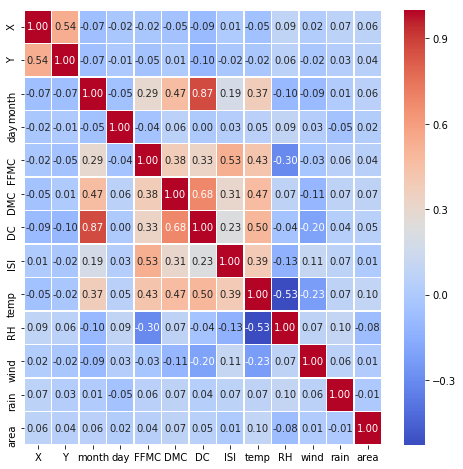

In [8]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap='coolwarm')
print ""

### Visualize distribution with density function

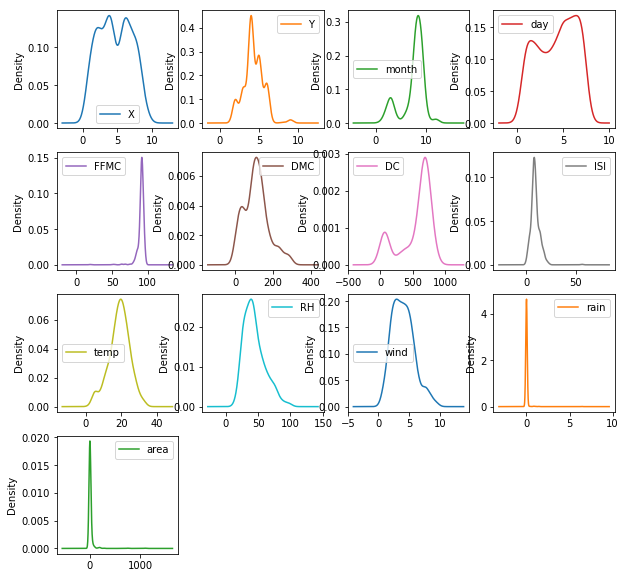

In [9]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(10,10))
print 

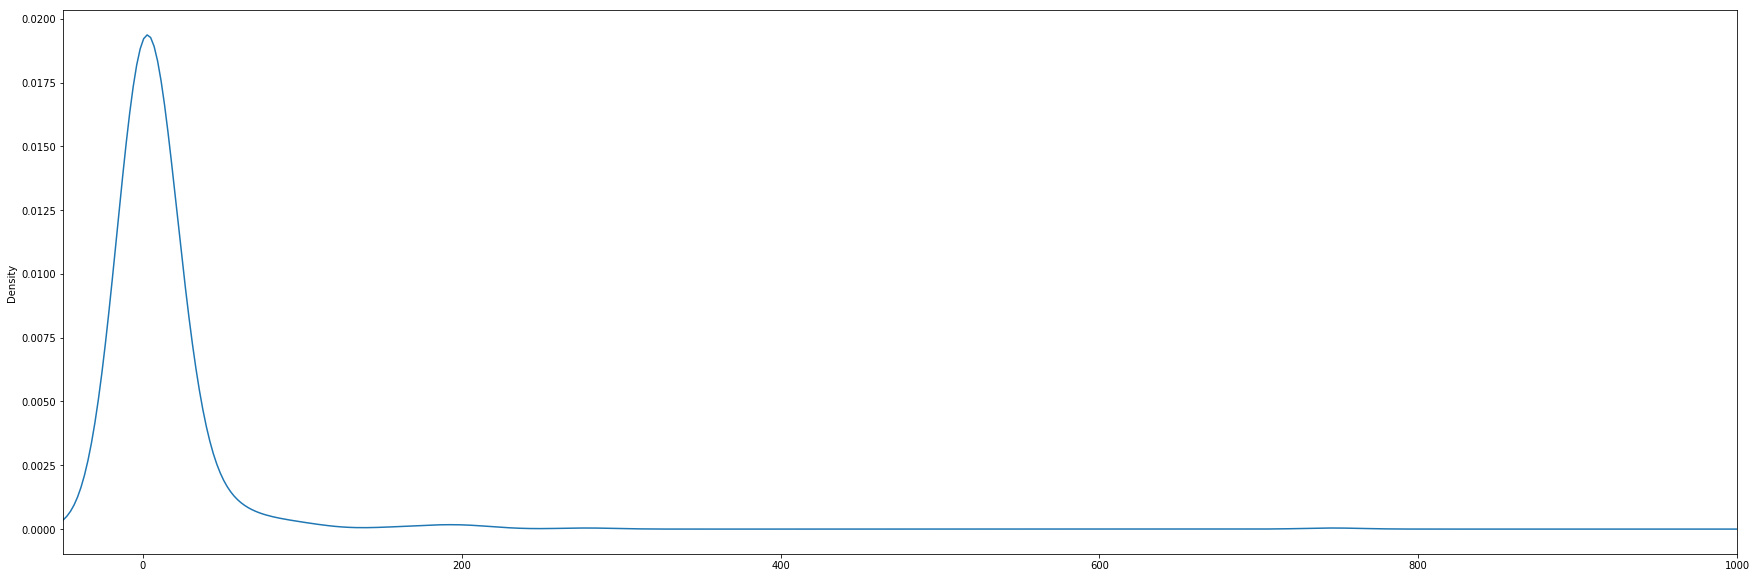

In [10]:
plt.figure(figsize=(30,10))
plt.xlim(-50,1000)
df['area'].plot(kind='density')

In [11]:
# separate for 70% training 30% testing
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3)

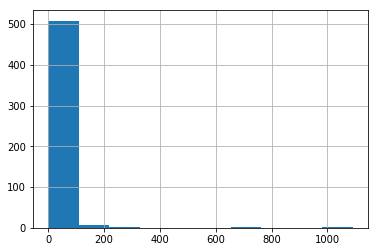

In [12]:
df['area'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f81e90>]], dtype=object)

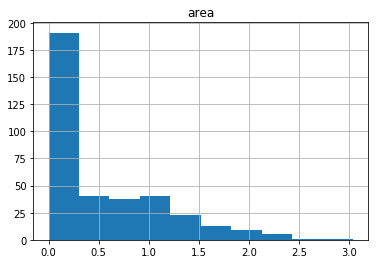

In [13]:
import math
def transfer_to_log(x):
    return math.log10(x+1)
def transfer_to_ori(x):
    return math.power(10,x)

y_train_log = y_train.apply(transfer_to_log)
y_test_log = y_test.apply(transfer_to_log)

index = np.arange(0, len(y_train_log), 1)
temp = pd.DataFrame(y_train_log)
temp.hist()

In [14]:
X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.750,0.428571,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000
1,0.750,0.285714,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000
2,0.750,0.285714,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000
3,0.875,0.571429,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125
4,0.875,0.571429,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000


Decision Tree mean squared error = 5018.5160066
explained_variance_score: -0.303003708641


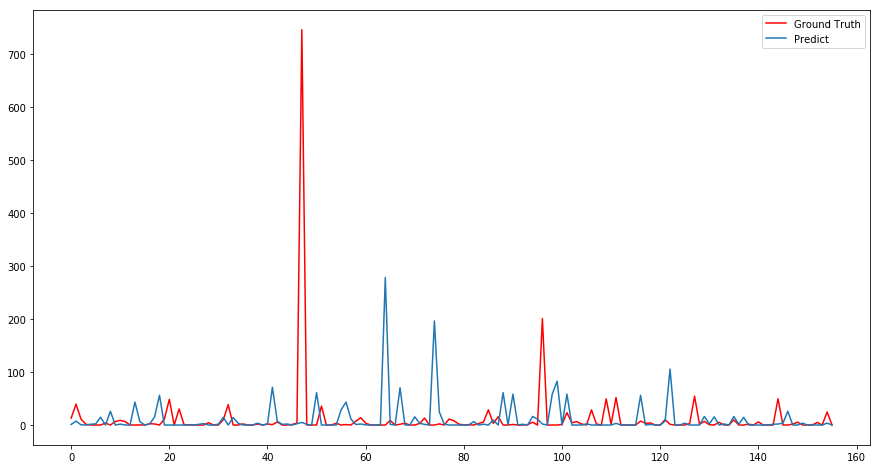

In [15]:


# Decision tree model
Decision_clf = tree.DecisionTreeRegressor()
Decision_clf = Decision_clf.fit(X_train[['temp','DMC']], y_train_log)

Decision_pre = Decision_clf.predict(X_test[['temp','DMC']])
Decision_pre = 10**Decision_pre - 1
Decision_err = mean_squared_error(y_test, Decision_pre)
print "Decision Tree mean squared error =",Decision_err
print "explained_variance_score:",explained_variance_score(y_test, Decision_pre)
index = np.arange(0, len(X_test), 1)


plt.figure(figsize=(15,8))
plt.plot(index,y_test,'r',label="Ground Truth")
plt.plot(index,Decision_pre,label="Predict")
plt.legend()

Decision Tree mean squared error = 4826.4522991
explained_variance_score: -0.249902705441


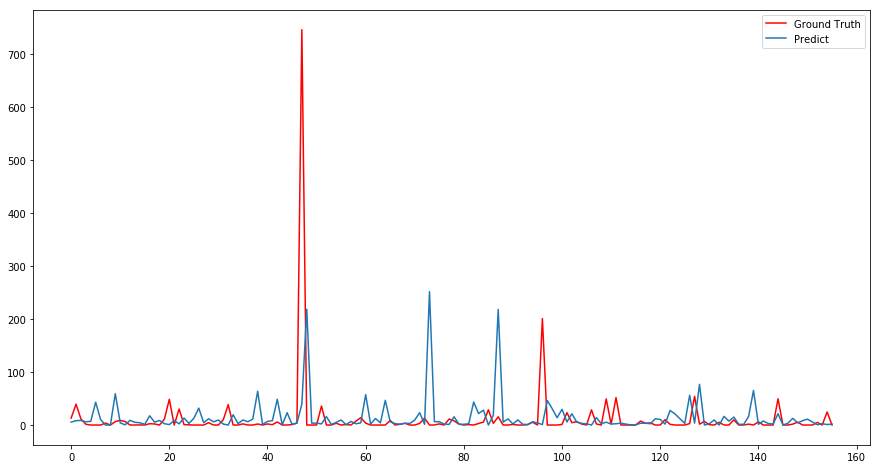

In [16]:
# KNN model
KNN_clf = KNeighborsRegressor(n_neighbors=5)
KNN_clf.fit(X_train, y_train)

KNN_pre = KNN_clf.predict(X_test)
KNN_acc = mean_squared_error(y_test, KNN_pre)
print "Decision Tree mean squared error =",KNN_acc
print "explained_variance_score:",explained_variance_score(y_test, KNN_pre)
index = np.arange(0, len(X_test), 1)


plt.figure(figsize=(15,8))
plt.plot(index,y_test,'r',label="Ground Truth")
plt.plot(index,KNN_pre,label="Predict")
plt.legend()

In [17]:
def area_to_class(target):
    if target == 0:
        return 0
    elif target > 0 and target <= 1:
        return 1
    elif target > 1 and target <= 10:
        return 2
    elif target > 10 and target <= 100:
        return 3
    elif target > 100 and target <= 1000:
        return 4
    elif target > 1000:
        return 5

In [18]:
NB_y_train = y_train.apply(area_to_class)
NB_y_test = y_test.apply(area_to_class)

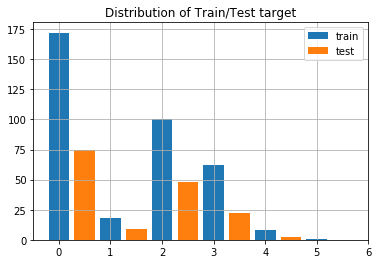

In [19]:
plt.title('Distribution of Train/Test target')
NB_y_train.hist(bins=[0,1,2,3,4,5,6],rwidth=0.4,align='left',label='train')
NB_y_test.hist(bins=[0,1,2,3,4,5,6],rwidth=0.4,label='test')
plt.legend()
print

### Define categorical features & continuous features

In [20]:
cat_train = X_train[['X','Y','month','day']]
con_train = X_train[['FFMC','DMC', 'DC', 'ISI', 'temp','RH', 'wind', 'rain']]

### Create categorical model - MultinomialNB (with Laplace smooth)
<img src='laplace.jpg' height='300' width='200'>

In [22]:
#Naive Bayes categorical model\
X_cat_test = X_test[['X','Y','month','day']]

Naive_cat_clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
Naive_cat_clf.fit(cat_train, NB_y_train)

Naive_cat_pre = Naive_cat_clf.predict(X_cat_test)
print "Accuracy:",round(accuracy_score(NB_y_test, Naive_cat_pre),4)*100

Accuracy: 48.08


In [24]:
Naive_cat_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Create continuous model - GaussianNB (with Gaussian smooth)
<img src='gaussian.jpg' height='400' width='300'>

In [25]:
#Naive Bayes continuous model
X_con_test = X_test[['FFMC','DMC', 'DC', 'ISI', 'temp','RH', 'wind', 'rain']]

Naive_con_clf = GaussianNB()
Naive_con_clf.fit(con_train, NB_y_train)

Naive_con_pre = Naive_con_clf.predict(X_con_test)
print round(accuracy_score(NB_y_test, Naive_con_pre),4)*100

15.38


In [26]:
Naive_con_clf.predict_proba(X_con_test).shape

(156, 6)

In [27]:
Naive_con_pre

array([0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 1, 0, 4, 1, 1,
       1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 4, 1, 4, 4, 1, 1,
       1, 1, 4, 0, 0, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 0, 4, 1, 0, 1, 1,
       1, 1, 4, 1, 4, 1, 0, 4, 0, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 0, 1, 1, 1,
       4, 4, 0, 1, 4, 1, 1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1,
       0, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 0, 1, 0, 1, 1, 4, 1, 0, 0, 4, 4,
       1, 1, 4, 1, 4, 1, 1, 0, 0, 1, 4, 1, 4, 1, 4, 0, 1, 1])

### Mix continous model & categorical model prediction
Concept of Naive Bayes: $$M(q)=argmax{ }P(Y)\prod_{i=0}^mP(X{_i}|Y)$$ <br>
Implementation of Mixture model: <br>
$$M(q)=argmax\, (log\,prob\,of\,categorical\,model + log\,prob\,of\,continuous\,model - log\,prob\,of\,prior) $$

In [29]:
cat_log_proba = Naive_cat_clf.predict_log_proba(X_cat_test)
con_log_proba = Naive_con_clf.predict_log_proba(X_con_test)
prior_log_proba = Naive_cat_clf.class_log_prior_
mix_prediction = (cat_log_proba + con_log_proba - prior_log_proba).argmax(1)
print mix_prediction
print "Accuracy:",round(accuracy_score(NB_y_test, mix_prediction),4)*100

[0 1 4 1 1 1 1 1 1 1 1 4 0 1 1 0 1 1 1 0 4 1 1 1 1 4 4 0 1 4 1 1 1 1 1 1 4
 4 0 0 4 1 4 4 1 1 1 1 4 0 0 1 1 1 4 1 1 1 4 1 1 1 4 0 4 1 0 1 1 1 1 4 1 4
 1 0 4 0 1 1 4 1 1 1 4 1 1 4 0 1 1 1 4 4 0 1 4 1 1 4 1 1 1 0 1 1 1 1 1 1 1
 0 4 0 1 0 4 1 1 4 4 1 1 4 4 1 1 0 1 0 1 1 4 1 0 0 4 4 1 1 4 1 4 1 1 0 0 1
 4 1 4 1 4 0 1 1]
Accuracy: 15.38


In [30]:
mix_prediction

array([0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 0, 1, 1, 1, 0, 4, 1, 1,
       1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 4, 1, 4, 4, 1, 1,
       1, 1, 4, 0, 0, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 0, 4, 1, 0, 1, 1,
       1, 1, 4, 1, 4, 1, 0, 4, 0, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 0, 1, 1, 1,
       4, 4, 0, 1, 4, 1, 1, 4, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1,
       0, 4, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 0, 1, 0, 1, 1, 4, 1, 0, 0, 4, 4,
       1, 1, 4, 1, 4, 1, 1, 0, 0, 1, 4, 1, 4, 1, 4, 0, 1, 1])

(array([ 156.,    0.,    0.,    0.,    0.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

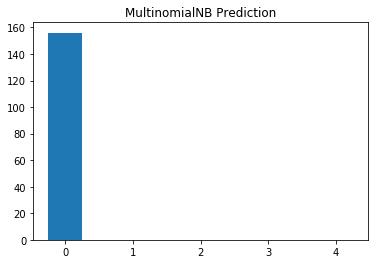

In [31]:
plt.title('MultinomialNB Prediction')
plt.hist(Naive_cat_pre,bins=[0,1,2,3,4,5],rwidth=0.5,align='left')


(array([ 26.,  90.,   0.,   0.,  40.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

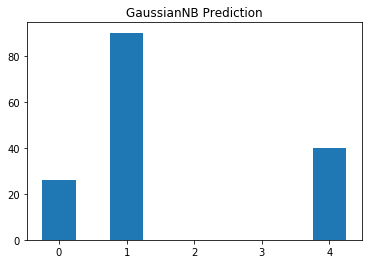

In [32]:
plt.title('GaussianNB Prediction')
plt.hist(Naive_con_pre,bins=[0,1,2,3,4,5],rwidth=0.5,align='left')


(array([ 26.,  90.,   0.,   0.,  40.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

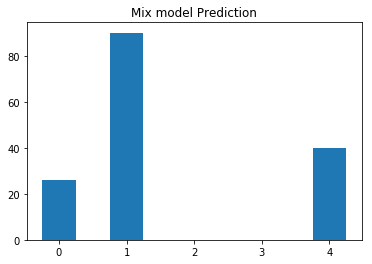

In [33]:
plt.title('Mix model Prediction')
plt.hist(Naive_con_pre,bins=[0,1,2,3,4,5],rwidth=0.5,align='left')
